<h1>Пример из хода работы</h1>

In [25]:
import numpy as np
from sklearn.datasets import load_files
reviews_train=load_files("aclImdb/train/")
text_train, y_train=reviews_train.data, reviews_train.target

In [26]:
text_train=[doc.replace(b"<br /", b" ") for doc in text_train]

In [27]:
reviews_test=load_files("aclImdb/test/")
text_test, y_test=reviews_test.data, reviews_test.target
text_test=[doc.replace(b"<br /", b" ") for doc in text_test]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(max_features=10000, max_df=.15)
X=vect.fit_transform(text_train)

In [29]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics=lda.fit_transform(X)

In [6]:
lda.components_.shape

(10, 10000)

In [7]:
sorting=np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names=np.array(vect.get_feature_names_out())

In [8]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        worst         plays         cast          show          
horror        didn          comedy        role          funny         
game          nothing       role          john          book          
effects       horror        school        performance   saw           
original      actually      town          star          years         
quite         minutes       harry         young         again         
fight         funny         played        play          10            
lot           actors        western       music         comedy        
however       re            joe           musical       am            
though        going         girl          plays         dvd           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [ ]:
lda100=LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100=lda100.fit_transform(X)

In [43]:
topics=np.array([7,16,24,25,28,36,37,45,51,53,54,63, 89,97])
sorting=np.argsort(lda100.components_, axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,sorting=sorting,topics_per_chunk=7,n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
with          with          with          with          with          with          with          
immersive     immersive     immersive     immersive     immersive     immersive     immersive     
felt          felt          felt          felt          felt          felt          felt          
finish        finish        finish        finish        finish        finish        finish        
finished      finished      finished      finished      finished      finished      finished      
friends       friends       friends       friends       friends       friends       friends       
from          from          from          from          from          from          from          
heartwarming  heartwarming  heartwarming  heartwarming  heartwarming  heartwarming  heartwarming  
highly    

In [44]:
music=np.argsort(document_topics100[:,45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2])+b".\n")

b'The hype around this novel was unwarranted. The narrative was predictable, and the twists were clich\xc3\xa9.\n'
b'I highly recommend this book to anyone seeking an immersive and thoughtfully crafted story..\n'
b"I couldn't stop thinking about this book. The narrative was thought-provoking, and the themes were powerful.\n"
b'This novel was a page-turner. The pacing was perfect, and the suspense kept me engaged throughout.\n'
b'This book was a struggle to finish. The pacing was off, and it lacked any engaging elements.\n'
b'A delightful surprise! The plot was refreshing, and the characters felt like old friends by the end..\n'
b"A promising start quickly led to a confusing and convoluted plot. I couldn't make sense of it.\n"
b'I expected much more from this book, but it turned out to be mundane and uninspiring..\n'
b'The characters were one-dimensional, and their actions seemed unrealistic. It ruined the whole reading experience.\n'
b'An uplifting and heartwarming read. The author ski

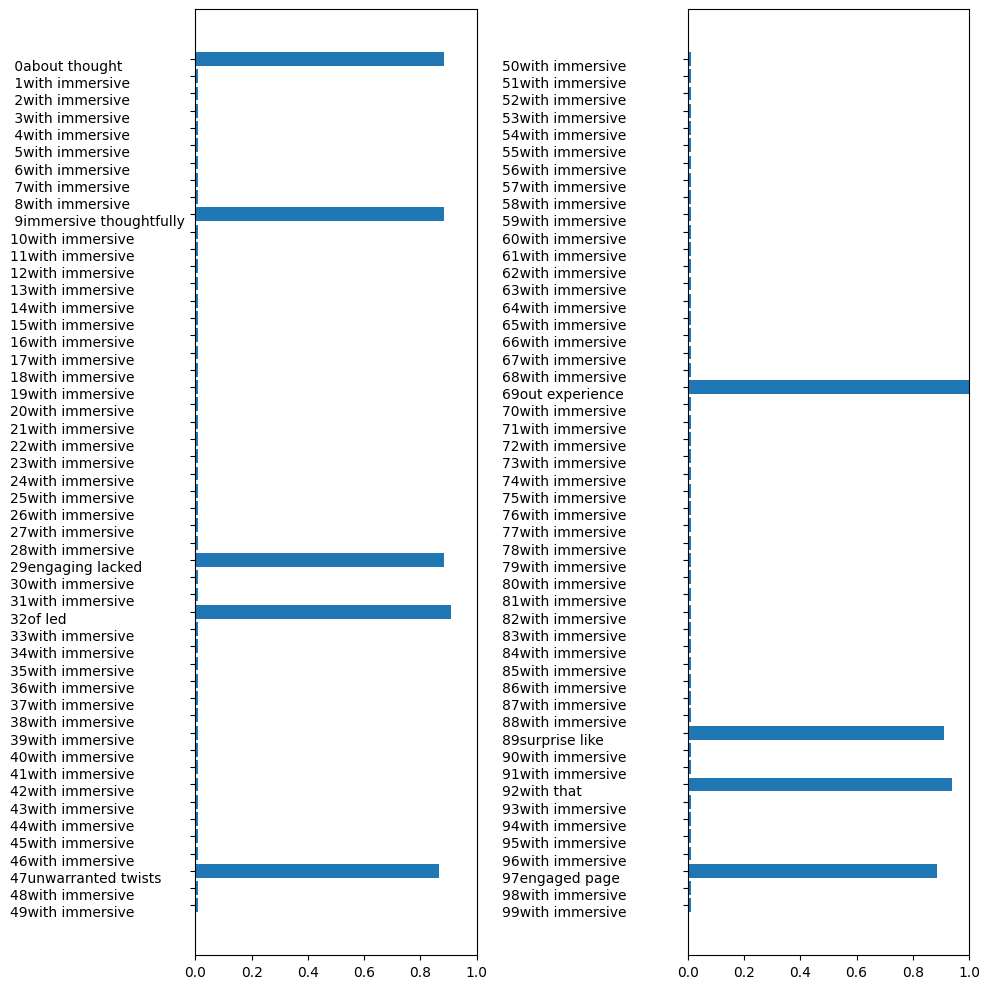

In [46]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1,2,figsize=(10,10))
topic_names=["{:>2}".format(i)+" ".join(words)
             for i, words in enumerate(feature_names[sorting[:,:2]])]
for col in [0,1]:
    start=col*50
    end=(col+1)*50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 1)
    yax=ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()